# AWS Titan Multimodal Embedddings
This notebook is designed to explore the **AWS Titan multimodal embeddings** model as provided from AWS within the AWS Bedrock service. The particular interest in this notebook is to test out how this model works in embedding images and being able to compare similarity between the images.

## Notebook Setup

In [1]:
# Importing the necessary Python libraries
import os
import json
import yaml
import base64

import boto3
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Loading the API keys from a local file
with open('../keys/api_keys.yaml', 'r') as f:
    api_keys = yaml.safe_load(f)

In [3]:
# Setting the AWS environment variables
os.environ['AWS_ACCESS_KEY_ID'] = api_keys['AWS_ACCESS_KEY_ID']
os.environ['AWS_SECRET_ACCESS_KEY'] = api_keys['AWS_SECRET_ACCESS_KEY']
os.environ['AWS_DEFAULT_REGION'] = 'us-east-1'

In [8]:
# Setting the AWS Bedrock client
bedrock_client = boto3.client('bedrock')

## Loading Images from File
In this section, we will demonstrate how to load images from file and display them in the notebook.

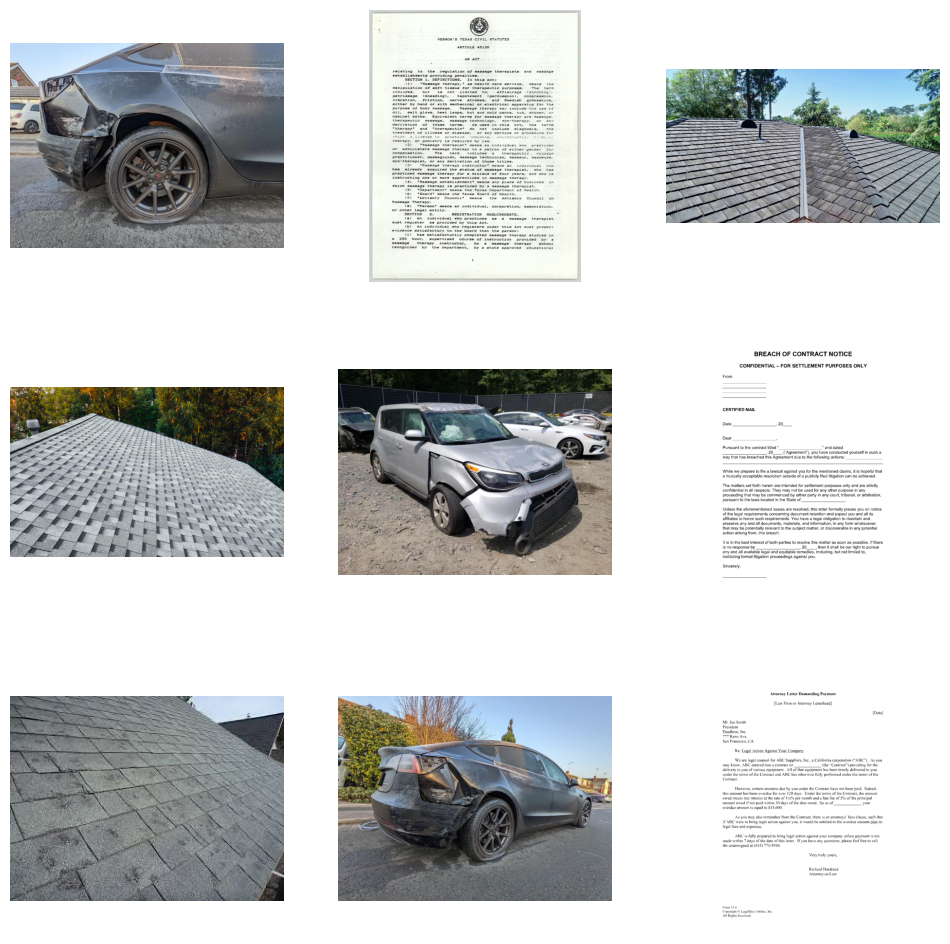

In [5]:
from PIL import Image
import os

import matplotlib.pyplot as plt

# Specifying the path to the directory containing the images
directory = 'data'

# Loading all the images from the directory
images = []
for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.webp') or filename.endswith('.png'):
        image_path = os.path.join(directory, filename)
        image = Image.open(image_path)
        images.append(image)

# Displaying the images inline
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')
plt.show()

In [6]:
# Convert images to base64 encoded strings
encoded_images = []
for image in images:
    with open(image.filename, "rb") as f:
        encoded_image = base64.b64encode(f.read()).decode("utf-8")
        encoded_images.append(encoded_image)